In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.shape

(210, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [9]:
df.nunique()

spending                        193
advance_payments                170
probability_of_full_payment     186
current_balance                 188
credit_limit                    184
min_payment_amt                 207
max_spent_in_single_shopping    148
dtype: int64

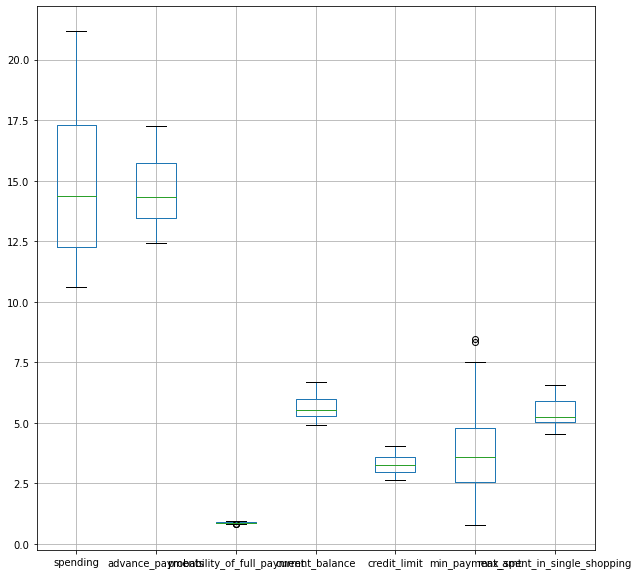

In [10]:
df.boxplot(figsize=(10,10))

Text(0.5, 1.0, 'max spend')

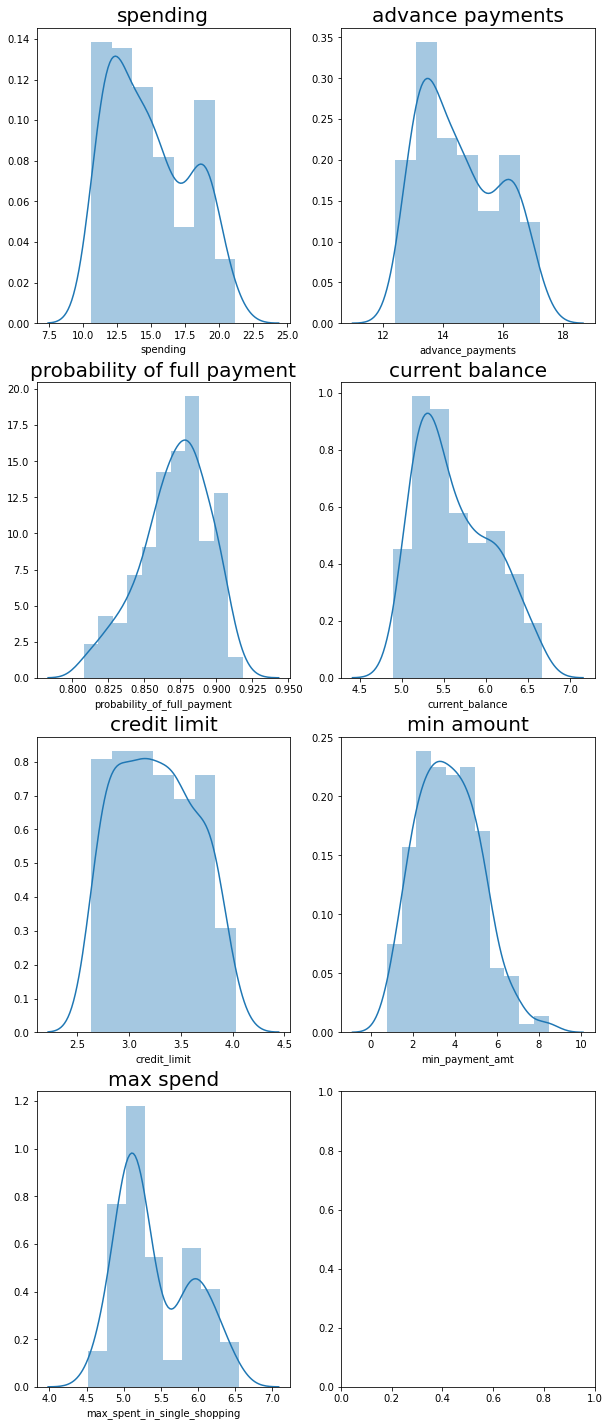

In [11]:
fig,axes=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,25)
a = sns.distplot(df['spending'] , ax=axes[0][0])
a.set_title("spending",fontsize=20)
a = sns.distplot(df['advance_payments'] , ax=axes[0][1])
a.set_title("advance payments",fontsize=20)
a = sns.distplot(df['probability_of_full_payment'] , ax=axes[1][0])
a.set_title("probability of full payment",fontsize=20)
a = sns.distplot(df['current_balance'] , ax=axes[1][1])
a.set_title("current balance",fontsize=20)
a = sns.distplot(df['credit_limit'] , ax=axes[2][0])
a.set_title("credit limit",fontsize=20)
a = sns.distplot(df['min_payment_amt'] , ax=axes[2][1])
a.set_title("min amount",fontsize=20)
a = sns.distplot(df['max_spent_in_single_shopping'] , ax=axes[3][0])
a.set_title("max spend",fontsize=20)


In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
X=StandardScaler()

In [15]:
scaled_df=pd.DataFrame(X.fit_transform(df),columns=df.columns)
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [16]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.260896e-15,-1.358702e-16,-2.790757e-16,5.418946e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [17]:
link=linkage(scaled_df,method='ward')

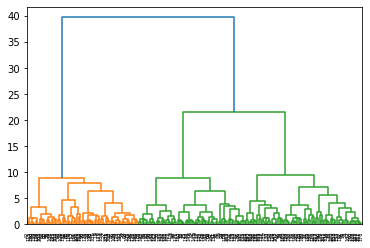

In [18]:
dend=dendrogram(link)

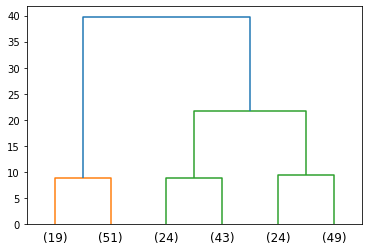

In [19]:
dend=dendrogram(link,truncate_mode="lastp",p=6)

In [20]:
from scipy.cluster.hierarchy import fcluster

In [21]:
cluster=fcluster(link,2,criterion='maxclust')
cluster

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [22]:
df['Fclusters']=cluster

In [23]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Fclusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [24]:
df.Fclusters.value_counts().sort_index()

1     70
2    140
Name: Fclusters, dtype: int64

In [25]:
pd.pivot_table(df,index="Fclusters",aggfunc='mean')

,advance_payments,credit_limit,current_balance,max_spent_in_single_shopping,min_payment_amt,probability_of_full_payment,spending
Fclusters,,,,,,,
1,16.145429,3.684629,6.158171,6.017371,3.639157,0.884400,18.371429
2,13.766214,3.045593,5.363714,5.103421,3.730723,0.864298,13.085571


In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(scaled_df)
print(Cluster_agglo)

[1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0]


In [28]:
New_df=df.copy()
New_df['Agglo_clusters']=Cluster_agglo
New_df.Agglo_clusters.value_counts().sort_index()

0    140
1     70
Name: Agglo_clusters, dtype: int64

In [29]:
New_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Fclusters,Agglo_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


K Means

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [31]:
from sklearn.cluster import KMeans 
KMeans=KMeans(n_clusters=2,random_state=20)
KMeans.fit(scaled_df)
print("K mean inertia score for two clusters is ",KMeans.inertia_)
labels = KMeans.labels_
print('labels=',labels)
print("Silhouette score for two clusters",silhouette_score(scaled_df,labels))

K mean inertia score for two clusters is  659.171754487041
labels= [0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0]
Silhouette score for two clusters 0.46577247686580914


In [32]:
KMeans.cluster_centers_

array([[ 1.14065367,  1.14788697,  0.54376886,  1.1287036 ,  1.06661287,
        -0.14652535,  1.1496198 ],
       [-0.66037844, -0.66456614, -0.31481355, -0.65345998, -0.61751272,
         0.08483047, -0.66556936]])

In [33]:
from sklearn.cluster import KMeans 
K_Means=KMeans(n_clusters=3,random_state=20)
K_Means.fit(scaled_df)
print("K mean inertia score for three clusters is ",K_Means.inertia_)
label1 = K_Means.labels_
print ("Silhouette score for three clusters is ",silhouette_score(scaled_df,label1))

K mean inertia score for three clusters is  430.6589731513006
Silhouette score for three clusters is  0.4007270552751299


In [34]:
wss=[]

In [35]:
from sklearn.cluster import KMeans 

In [36]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [37]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.65314399951626,
 326.3625415410697,
 291.7636483521759,
 262.32764804227406,
 240.69598443802045,
 225.42508916683477,
 205.12716661277597]

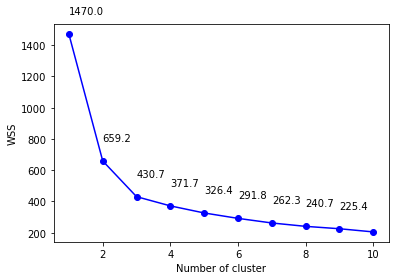

In [38]:
plt.plot(range(1,11), wss,'bo-')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
for x,y in zip(range(1,10),wss):
    label="{:.1f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,20),ha='left')

In [39]:
df["Kmean_clusters"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Fclusters,Kmean_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0


In [40]:
df.Kmean_clusters.value_counts().sort_index()

0     77
1    133
Name: Kmean_clusters, dtype: int64

In [41]:
cluster_profile=df.drop(['Fclusters'],axis=1)
cluster_profile=cluster_profile.groupby('Kmean_clusters').mean()
cluster_profile['frequency']=df.Kmean_clusters.value_counts().sort_index()
cluster_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,frequency
Kmean_clusters,,,,,,,,
0,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77
1,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133


# Problem 2



In [200]:
df2=pd.read_csv("insurance_part2_data.csv")

In [201]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [202]:
df2.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [205]:
df2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


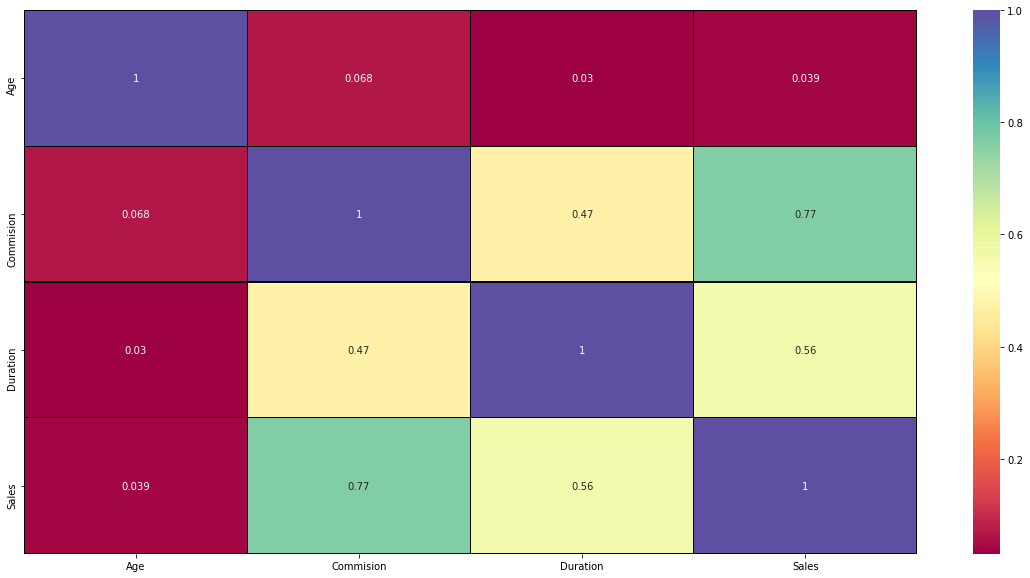

In [206]:
corr=df2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linewidths=.2,linecolor='black',cmap='Spectral')


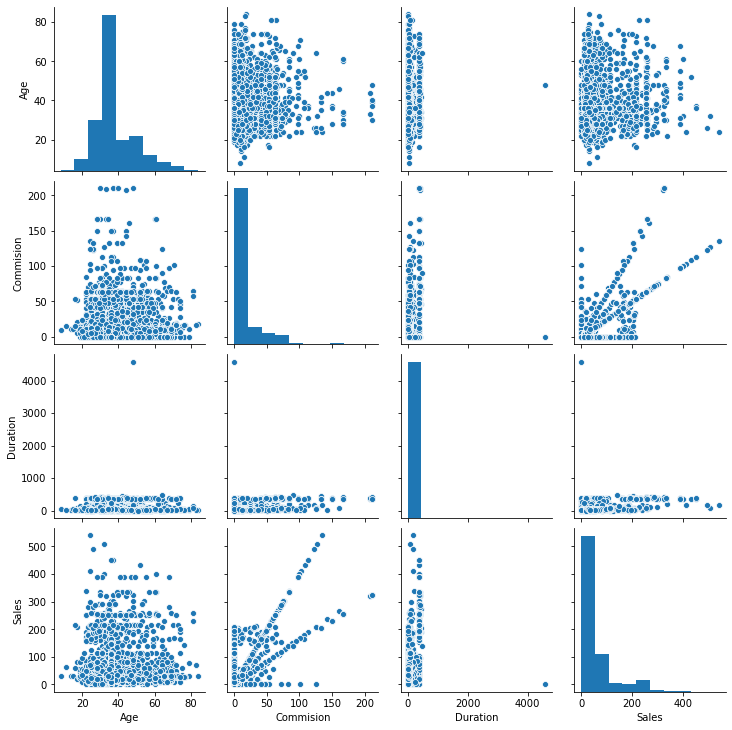

In [46]:
sns.pairplot(df2)

Text(0.5, 1.0, 'Sales')

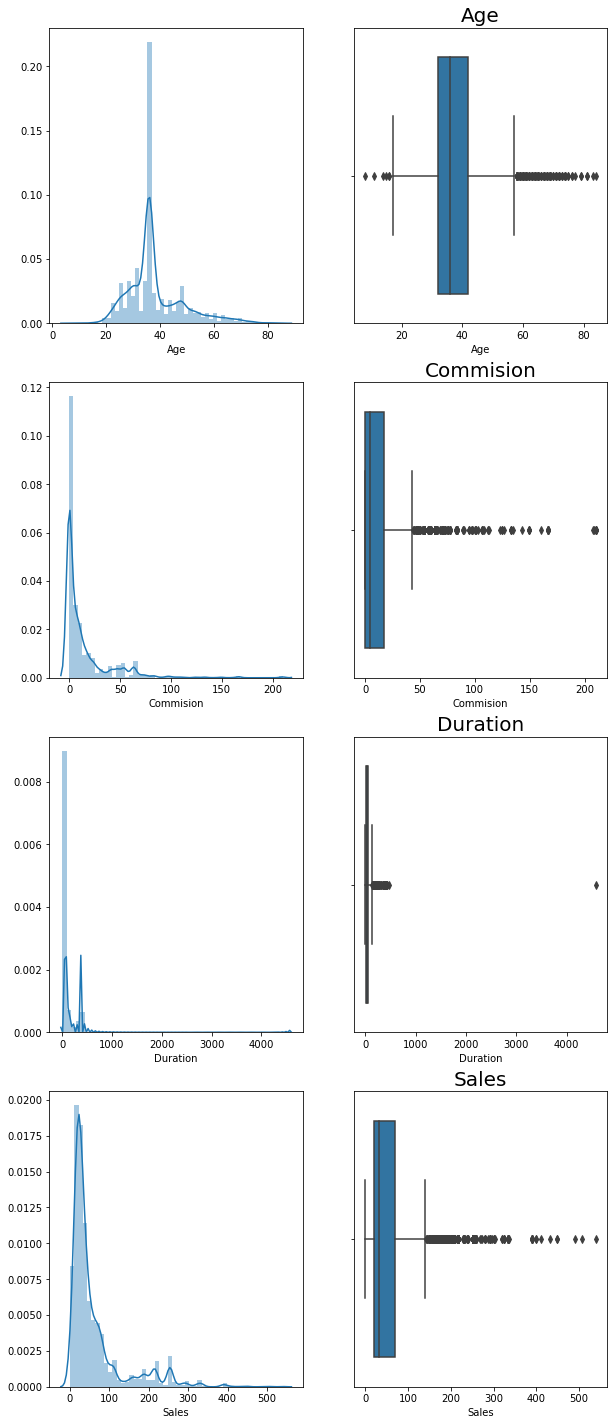

In [47]:
fig,axes=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,25)
a = sns.distplot(df2['Age'] , ax=axes[0][0])
a = sns.boxplot(df2['Age'] , ax=axes[0][1])
a.set_title("Age",fontsize=20)
a = sns.distplot(df2['Commision'] , ax=axes[1][0])
a = sns.boxplot(df2['Commision'] , ax=axes[1][1])
a.set_title("Commision",fontsize=20)
a = sns.distplot(df2['Duration'] , ax=axes[2][0])
a = sns.boxplot(df2['Duration'] , ax=axes[2][1])
a.set_title("Duration",fontsize=20)
a = sns.distplot(df2['Sales'] , ax=axes[3][0])
a = sns.boxplot(df2['Sales'] , ax=axes[3][1])
a.set_title("Sales",fontsize=20)




In [48]:
df2.skew()

Age           1.149713
Commision     3.148858
Duration     13.784681
Sales         2.381148
dtype: float64

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [50]:
for feature in df2.columns:
    if df2[feature].dtype=='object':
         df2[feature]=pd.Categorical(df2[feature]).codes        

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [52]:
print(df2['Agency_Code'].value_counts())
print("")
print(df2['Type'].value_counts())
print("")
print(df2['Claimed'].value_counts())
print("")
print(df2['Product Name'].value_counts())
print("")
print(df2['Channel'].value_counts())
print("")
print(df2['Destination'].value_counts())



2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64

1    1837
0    1163
Name: Type, dtype: int64

0    2076
1     924
Name: Claimed, dtype: int64

2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64

1    2954
0      46
Name: Channel, dtype: int64

0    2465
1     320
2     215
Name: Destination, dtype: int64


In [53]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [54]:
print(df2['Agency_Code'].value_counts())
print("")
print(df2['Type'].value_counts())
print("")
print(df2['Claimed'].value_counts())
print("")
print(df2['Product Name'].value_counts())
print("")
print(df2['Channel'].value_counts())
print("")
print(df2['Destination'].value_counts())

2    1365
0     924
1     472
3     239
Name: Agency_Code, dtype: int64

1    1837
0    1163
Name: Type, dtype: int64

0    2076
1     924
Name: Claimed, dtype: int64

2    1136
1     678
0     650
4     427
3     109
Name: Product Name, dtype: int64

1    2954
0      46
Name: Channel, dtype: int64

0    2465
1     320
2     215
Name: Destination, dtype: int64


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [56]:
print(df2.Claimed.value_counts(normalize=True))

0    0.692
1    0.308
Name: Claimed, dtype: float64


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X =df2.drop("Claimed", axis=1,errors='ignore')
y=df2.pop('Claimed')
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [59]:
X_train, X_test, train_labels,test_labels= train_test_split(X,y,test_size=.30,random_state=0)

In [60]:
print(X_train.nunique())
print("")
print('shape of training data =',X_train.shape)

Age              66
Agency_Code       4
Type              2
Commision       273
Channel           2
Duration        228
Sales           319
Product Name      5
Destination       3
dtype: int64

shape of training data = (2100, 9)


In [61]:
print(X_test.nunique())
print("")
print("shape of testing data =",X_test.shape)

Age              60
Agency_Code       4
Type              2
Commision       165
Channel           2
Duration        180
Sales           217
Product Name      5
Destination       3
dtype: int64

shape of testing data = (900, 9)


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DT_model=DecisionTreeClassifier(criterion='gini',random_state=1)

In [64]:
DT_model.fit(X_train,train_labels)

DecisionTreeClassifier(random_state=1)

In [65]:
from sklearn import tree

In [66]:
train_char=['Yes','No']
df2_file=open('df2_file.dot','w')
dot_file=tree.export_graphviz(DT_model,
                             out_file=df2_file,
                             feature_names=list(X_train),
                             class_names=list(train_char))
df2_file.close()

In [67]:
pd.DataFrame(DT_model.feature_importances_,columns=['Importance'],index=df2.columns).sort_values("Importance",ascending=False)

,Importance
Duration,0.271340
Sales,0.211506
Age,0.179722
Agency_Code,0.175714
Commision,0.100519
Product Name,0.041354
Destination,0.013214
Channel,0.004510
Type,0.002121


In [68]:
y_trainpredict=DT_model.predict(X_train)
y_testpredict=DT_model.predict(X_test)


In [69]:
print(y_trainpredict.shape)
print(y_testpredict.shape)
print(y_testpredict)

(2100,)
(900,)
[0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0
 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0

In [70]:
ytest_prob= DT_model.predict_proba(X_test)
ytest_prob

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [71]:
pd.DataFrame(ytest_prob).head(5)

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

[0. 1. 1. ... 0. 0. 0.]
AUC: 1.000


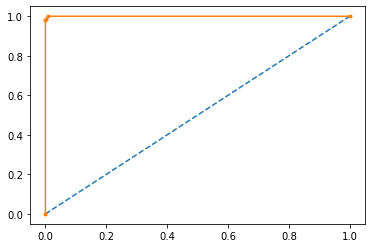

In [73]:
train_prob=DT_model.predict_proba(X_train)
train_prob=train_prob[:,1]
print(train_prob)
auc = roc_auc_score(train_labels,train_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

[0.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.
 1.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
 0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.
 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.
 1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.
 0.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  1.
 1.  0.5 0.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
 1.  0.  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.
 1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  1.
 0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.
 1.  1.  1.  0.  1.  1.  1.  0.  0.5 1.  1.  0.  0.  1.  1.  0.  0.  0.
 0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.
 1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0. 

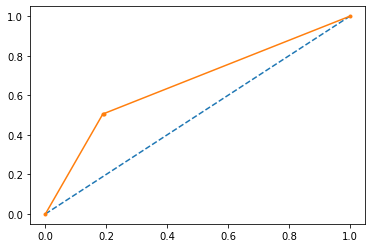

In [74]:
test_prob=DT_model.predict_proba(X_test)
test_prob=test_prob[:,1]
print(test_prob)
auc = roc_auc_score(test_labels,test_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
confusion_matrix(train_labels, y_trainpredict)

array([[1463,    1],
       [  10,  626]], dtype=int64)

In [77]:
DT_model.score(X_train,train_labels) 

0.9947619047619047

In [78]:
print(classification_report(train_labels, y_trainpredict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1464
           1       1.00      0.98      0.99       636

    accuracy                           0.99      2100
   macro avg       1.00      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [79]:
confusion_matrix(test_labels, y_testpredict)

array([[497, 115],
       [143, 145]], dtype=int64)

In [80]:
DT_model.score(X_test,test_labels)

0.7133333333333334

In [81]:
print(classification_report(test_labels, y_testpredict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       612
           1       0.56      0.50      0.53       288

    accuracy                           0.71       900
   macro avg       0.67      0.66      0.66       900
weighted avg       0.71      0.71      0.71       900



In [82]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':['gini'],
    'max_depth':[25,26,27,28],
    'min_samples_split':[2,4,10,20],
    'min_samples_leaf':[1,2,3,4]
    
}
cl=DecisionTreeClassifier(random_state=1)
grid=GridSearchCV(estimator=cl,param_grid=param_grid,cv=10)

In [83]:
grid.fit(X_train,train_labels)
bestgrid=grid.best_estimator_
bestgrid

DecisionTreeClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=20,
                       random_state=1)

In [84]:
NDT_file=open('NDT_file.dot','w')
Ndot_file=tree.export_graphviz(bestgrid,out_file=NDT_file,
                               feature_names=list(X_train),class_names=list(train_char))
NDT_file.close()


In [85]:
print (pd.DataFrame(bestgrid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.333839
Sales         0.225027
Duration      0.164016
Age           0.113349
Commision     0.088623
Product Name  0.052862
Destination   0.017179
Channel       0.005104
Type          0.000000


In [86]:
y_trainpredict=bestgrid.predict(X_train)
y_testpredict=bestgrid.predict(X_test)


In [87]:
ytest_prob= bestgrid.predict_proba(X_test)
print(ytest_prob)

[[1.  0. ]
 [1.  0. ]
 [0.5 0.5]
 ...
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]]


[0.         0.66666667 0.86666667 ... 0.         0.         0.        ]
AUC: 0.658


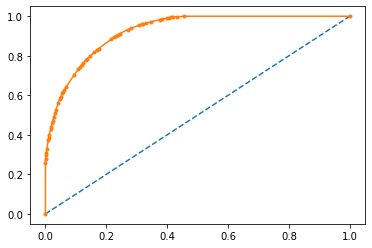

In [88]:
train_prob=bestgrid.predict_proba(X_train)
train_prob=train_prob[:,1]
print(train_prob)
auc1 = roc_auc_score(train_labels,train_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')
plt.show()

In [89]:
cart_train_acc=bestgrid.score(X_train,train_labels) 
cart_train_acc

0.8442857142857143

AUC: 0.658


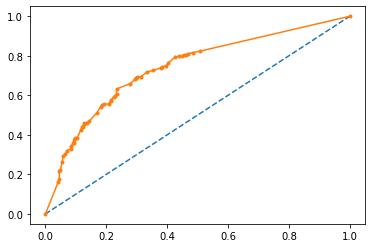

In [90]:
test_prob=bestgrid.predict_proba(X_test)
test_prob=test_prob[:,1]
auc2 = roc_auc_score(test_labels,test_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [91]:
confusion_matrix(train_labels, y_trainpredict)

array([[1366,   98],
       [ 229,  407]], dtype=int64)

In [92]:
print(classification_report(train_labels, y_trainpredict))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1464
           1       0.81      0.64      0.71       636

    accuracy                           0.84      2100
   macro avg       0.83      0.79      0.80      2100
weighted avg       0.84      0.84      0.84      2100



In [93]:
cart_metrics=classification_report(train_labels, y_trainpredict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.81
cart_train_recall  0.64
cart_train_f1  0.71


In [94]:
confusion_matrix(test_labels, y_testpredict)

array([[524,  88],
       [153, 135]], dtype=int64)

In [95]:
cart_test_acc=bestgrid.score(X_test,test_labels) 
cart_test_acc

0.7322222222222222

In [96]:
print(classification_report(test_labels, y_testpredict))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       612
           1       0.61      0.47      0.53       288

    accuracy                           0.73       900
   macro avg       0.69      0.66      0.67       900
weighted avg       0.72      0.73      0.72       900



In [97]:
cart_metrics=classification_report(test_labels, y_testpredict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_f1=round(df.loc["1"][2],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_precision=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.61
cart_test_recall  0.47
cart_test_f1  0.53


# Random Forest


In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl=rfcl.fit(X_train, train_labels)

In [100]:
y_trainpredict=rfcl.predict(X_train)
y_testpredict=rfcl.predict(X_test)


In [101]:
ytest_prob= rfcl.predict_proba(X_test)
ytest_prob

array([[0.97205589, 0.02794411],
       [0.21224218, 0.78775782],
       [0.99001996, 0.00998004],
       ...,
       [0.99600798, 0.00399202],
       [0.84231537, 0.15768463],
       [0.55289421, 0.44710579]])

[0.00598802 0.68263473 0.99800399 ... 0.00199601 0.00399202 0.07784431]
AUC: 1.000


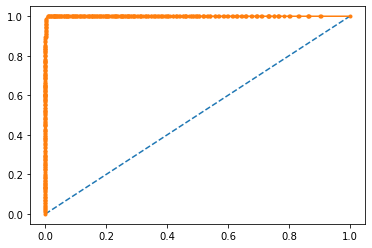

In [102]:
train_prob=rfcl.predict_proba(X_train)
train_prob=train_prob[:,1]
print(train_prob)
auc = roc_auc_score(train_labels,train_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [103]:
print(classification_report(train_labels,y_trainpredict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1464
           1       1.00      0.99      0.99       636

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



AUC: 0.810


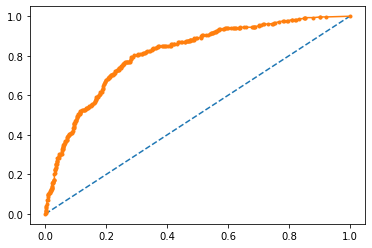

In [104]:
test_prob=rfcl.predict_proba(X_test)
test_prob=test_prob[:,1]
auc = roc_auc_score(test_labels,test_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [105]:
print(classification_report(test_labels,y_testpredict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       612
           1       0.67      0.52      0.59       288

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900



In [106]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.260713
Sales         0.212895
Age           0.179675
Commision     0.121997
Agency_Code   0.092403
Product Name  0.087261
Destination   0.022030
Type          0.017723
Channel       0.005303


# Tuned RandomForest

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7],
    'max_features': [5],
    'min_samples_leaf': [5,6],
    'min_samples_split': [240,245],
    'n_estimators': [101,501]
}

rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, n_jobs=-1,cv = 9)

In [108]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7], 'max_features': [5],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [240, 245],
                         'n_estimators': [101, 501]})

In [109]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 240,
 'n_estimators': 501}

In [110]:
GSE=grid_search.best_estimator_
GSE

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=6,
                       min_samples_split=240, n_estimators=501)

In [114]:
ytrain_predict = GSE.predict(X_train)
ytest_predict = GSE.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix,classification_report

In [116]:
confusion_matrix(train_labels,ytrain_predict)

array([[1311,  153],
       [ 312,  324]], dtype=int64)

In [117]:
confusion_matrix(test_labels,ytest_predict)

array([[558,  54],
       [146, 142]], dtype=int64)

In [118]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1464
           1       0.68      0.51      0.58       636

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [119]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.68
rf_train_recall  0.51
rf_train_f1  0.58


In [120]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       612
           1       0.72      0.49      0.59       288

    accuracy                           0.78       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.78      0.76       900



In [121]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.72
rf_test_recall  0.49
rf_test_f1  0.59


[0.12131356 0.21453015 0.75853215 ... 0.07615757 0.05088581 0.13566001]
AUC: 0.810


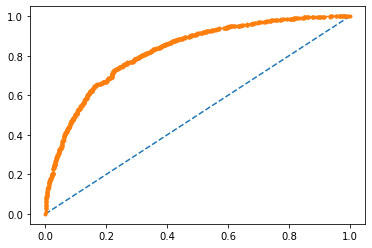

In [122]:
train_prob=GSE.predict_proba(X_train)
train_prob=train_prob[:,1]
print(train_prob)
auc3 = roc_auc_score(train_labels,train_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [131]:
rf_train_acc=GSE.score(X_train,train_labels) 
rf_train_acc

0.7785714285714286

AUC: 0.810


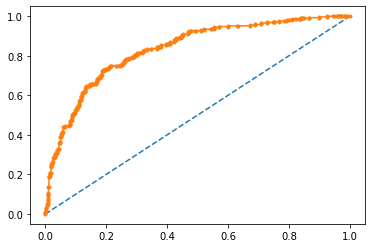

In [132]:
test_prob=GSE.predict_proba(X_test)
test_prob=test_prob[:,1]
auc4 = roc_auc_score(test_labels,test_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [133]:
rf_test_acc=GSE.score(X_test,test_labels) 
rf_test_acc

0.7777777777777778

In [134]:
print (pd.DataFrame(GSE.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.403584
Product Name  0.279095
Sales         0.158710
Commision     0.081581
Duration      0.034594
Type          0.025705
Age           0.009093
Destination   0.005227
Channel       0.002410


# ANN

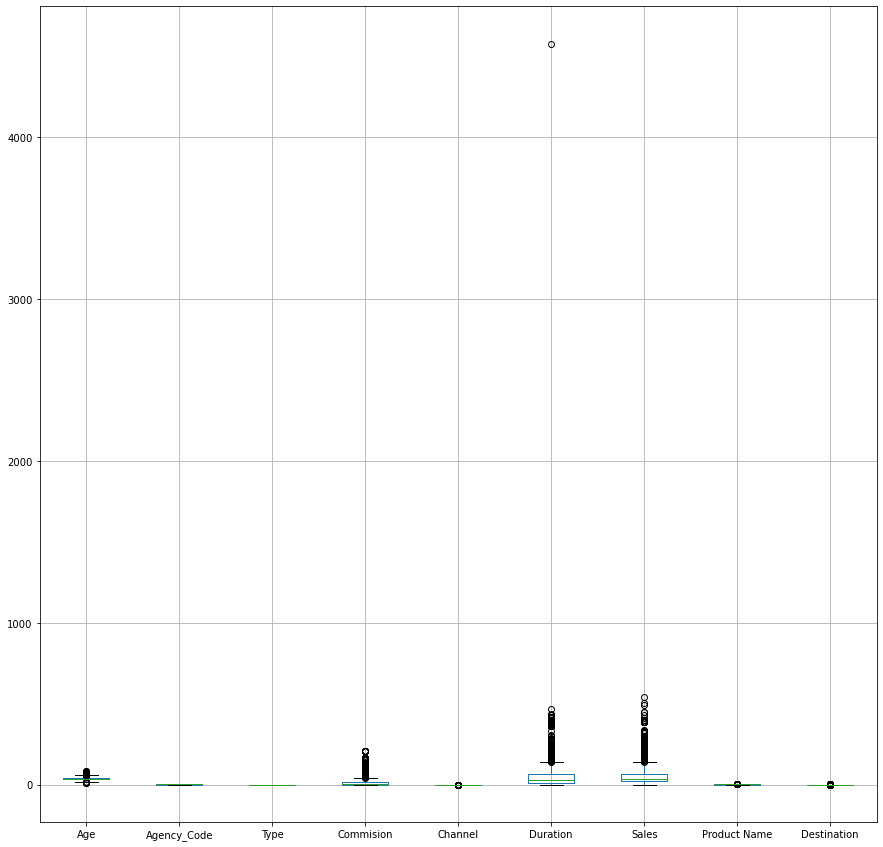

In [135]:
plt.figure(figsize=(15,15))
df2.boxplot()

In [136]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [137]:
for feature in df2[['Age','Commision','Duration','Sales','Channel','Product Name','Destination','Type']]: 
    lr,ur=treat_outlier(df2[feature])
    df2[feature]=np.where(df2[feature]>ur,ur,df2[feature])
    df2[feature]=np.where(df2[feature]<lr,lr,df2[feature])

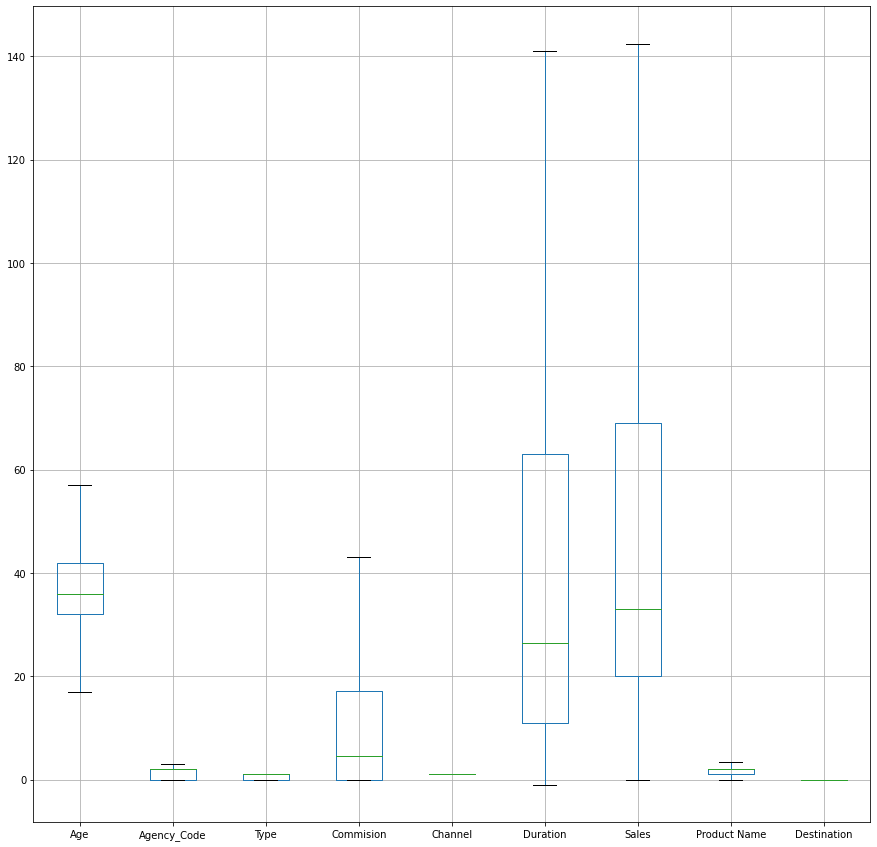

In [138]:
plt.figure(figsize=(15,15))
df2.boxplot()

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
sc = StandardScaler()

In [141]:
X_train = sc.fit_transform(X_train)

In [142]:
X_train.shape

(2100, 9)

In [143]:
X_test = sc.transform(X_test)

In [144]:
X_test.shape

(900, 9)

In [145]:
from sklearn.neural_network import MLPClassifier

In [146]:
clf = MLPClassifier(hidden_layer_sizes=136, max_iter=5000,
                     solver='adam', verbose=True,  random_state=1,tol=0.01)

In [147]:
clf.fit(X_train,train_labels)

Iteration 1, loss = 0.69182255
Iteration 2, loss = 0.59551182
Iteration 3, loss = 0.54260270
Iteration 4, loss = 0.51614776
Iteration 5, loss = 0.50436064
Iteration 6, loss = 0.49802134
Iteration 7, loss = 0.49488356
Iteration 8, loss = 0.49262648
Iteration 9, loss = 0.49123177
Iteration 10, loss = 0.48961417
Iteration 11, loss = 0.48835178
Iteration 12, loss = 0.48756995
Iteration 13, loss = 0.48635169
Iteration 14, loss = 0.48548007
Iteration 15, loss = 0.48452412
Iteration 16, loss = 0.48361920
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=136, max_iter=5000, random_state=1, tol=0.01,
              verbose=True)

In [148]:
X_train_pred =clf.predict(X_train)

In [149]:
confusion_matrix(X_train_pred,train_labels)

array([[1317,  337],
       [ 147,  299]], dtype=int64)

In [151]:
ann_train=clf.score(X_train,train_labels)
ann_train

0.7695238095238095

In [152]:
print(classification_report(train_labels,X_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1464
           1       0.67      0.47      0.55       636

    accuracy                           0.77      2100
   macro avg       0.73      0.68      0.70      2100
weighted avg       0.76      0.77      0.76      2100



In [153]:
nn_metrics=classification_report(train_labels, X_train_pred,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.47
nn_train_f1  0.55


[0.17044946 0.26145586 0.80534912 ... 0.0900696  0.06221763 0.10247643]
AUC: 0.805


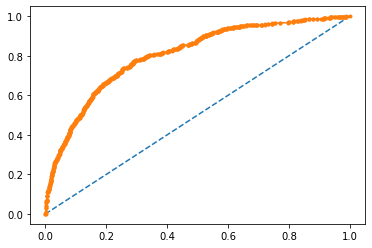

In [154]:
train_prob=clf.predict_proba(X_train)
train_prob=train_prob[:,1]
print(train_prob)
auc = roc_auc_score(train_labels,train_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [155]:
X_test_pred = clf.predict(X_test)

In [156]:
confusion_matrix(X_test_pred,test_labels)

array([[569, 153],
       [ 43, 135]], dtype=int64)

In [159]:
ann_test=clf.score(X_test,test_labels)
ann_test

0.7822222222222223

In [160]:
print(classification_report( test_labels,X_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       612
           1       0.76      0.47      0.58       288

    accuracy                           0.78       900
   macro avg       0.77      0.70      0.72       900
weighted avg       0.78      0.78      0.77       900



In [161]:
nn_metrics=classification_report(test_labels, X_test_pred,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.76
nn_test_recall  0.47
nn_test_f1  0.58


AUC: 0.825


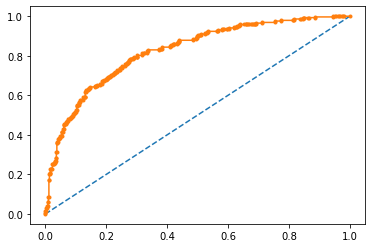

In [162]:
test_prob=clf.predict_proba(X_test)
test_prob=test_prob[:,1]
auc = roc_auc_score(test_labels,test_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [163]:
param_grid={
    'hidden_layer_sizes':[100,136,150,140],
    'max_iter':[2500],
    'solver':['adam','sgd'],
    'tol':[0.01,0.001,0.0001]
}
clf=MLPClassifier(random_state=1)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=10)

In [164]:
grid.fit(X_train,train_labels)
grid.best_params_

{'hidden_layer_sizes': 136, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.0001}

In [165]:
ANN_best=grid.best_estimator_
ANN_best

MLPClassifier(hidden_layer_sizes=136, max_iter=2500, random_state=1)

In [166]:
train_predict=ANN_best.predict(X_train)
test_predict=ANN_best.predict(X_test)

In [173]:
confusion_matrix(train_predict,train_labels)

array([[1308,  258],
       [ 156,  378]], dtype=int64)

In [177]:
ann_train_acc=ANN_best.score(X_train,train_labels)
ann_train_acc

0.8028571428571428

[0.07525436 0.5172138  0.85930189 ... 0.04839443 0.03144839 0.1697577 ]
AUC: 0.825


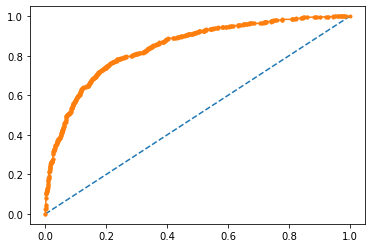

In [178]:
train_prob=ANN_best.predict_proba(X_train)
train_prob=train_prob[:,1]
print(train_prob)
auc5 = roc_auc_score(train_labels,train_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, train_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [179]:
print(classification_report(train_labels,train_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1464
           1       0.71      0.59      0.65       636

    accuracy                           0.80      2100
   macro avg       0.77      0.74      0.75      2100
weighted avg       0.80      0.80      0.80      2100



In [180]:
nn_metrics=classification_report(train_labels, train_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.59
nn_train_f1  0.65


In [181]:
confusion_matrix(test_predict,test_labels)

array([[543, 124],
       [ 69, 164]], dtype=int64)

In [182]:
ann_test_acc=ANN_best.score(X_test,test_labels)
ann_test_acc

0.7855555555555556

In [187]:
print(classification_report(test_labels,test_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       612
           1       0.70      0.57      0.63       288

    accuracy                           0.79       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.78      0.79      0.78       900



In [189]:
nn_metrics=classification_report(test_labels,test_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.7
nn_test_recall  0.57
nn_test_f1  0.63


AUC: 0.825


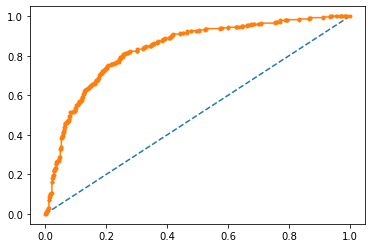

In [190]:
test_prob=ANN_best.predict_proba(X_test)
test_prob=test_prob[:,1]
auc6 = roc_auc_score(test_labels,test_prob)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, test_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [191]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,auc1,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,auc2,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,auc3,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,auc4,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,auc5,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[ann_test_acc,auc6,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.84,0.73,0.78,0.78,0.80,0.79
AUC,0.92,0.74,0.82,0.83,0.84,0.84
Recall,0.64,0.47,0.51,0.49,0.59,0.57
Precision,0.81,0.61,0.68,0.72,0.71,0.70
F1 Score,0.71,0.53,0.58,0.59,0.65,0.63
